In [71]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [11]:
df = pd.read_json('vancouver-collision-data/collision.json')
df.head()

,description,fatality,place,time
0,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.26838583100399...,"{'year': 2015, 'month': '10', 'day': '12', 'ho..."
1,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.22573928598938...,"{'year': 2015, 'month': '06', 'day': '11', 'ho..."
2,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.26750605320168...,"{'year': 2015, 'month': '09', 'day': '17', 'ho..."
3,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.27760406441052...,"{'year': 2015, 'month': '12', 'day': '16', 'ho..."
4,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.28977895278974...,"{'year': 2015, 'month': '06', 'day': '10', 'ho..."


In [14]:
#df = json_normalize(d, record_path='place', meta=['coordinates'])

In [15]:
df.head()

,description,fatality,place,time
0,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.26838583100399...,"{'year': 2015, 'month': '10', 'day': '12', 'ho..."
1,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.22573928598938...,"{'year': 2015, 'month': '06', 'day': '11', 'ho..."
2,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.26750605320168...,"{'year': 2015, 'month': '09', 'day': '17', 'ho..."
3,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.27760406441052...,"{'year': 2015, 'month': '12', 'day': '16', 'ho..."
4,Vehicle Collision or Pedestrian Struck,False,{'coordinates': {'latitude': 49.28977895278974...,"{'year': 2015, 'month': '06', 'day': '10', 'ho..."


In [27]:
df['longitude'] = df['place'].apply(lambda x: x['coordinates']['longitude'])
df['latitude'] = df['place'].apply(lambda x: x['coordinates']['latitude'])
df['address'] = df['place'].apply(lambda x: x['hundred_block'])
df['neighborhood'] = df['place'].apply(lambda x: x['neighborhood'])
df['year'] = df['time'].apply(lambda x: x['year'])
df['month'] = df['time'].apply(lambda x: x['month'])
df['day'] = df['time'].apply(lambda x: x['day'])
df['hour'] = df['time'].apply(lambda x: x['hour'])
df['minute'] = df['time'].apply(lambda x: x['minute'])
df.drop(['time', 'place'], axis=1, inplace=True)

In [38]:
df.reset_index(inplace=True) 

In [46]:
for col in ['year', 'month', 'day', 'hour', 'minute']:
    df[col] = df[col].astype(int)

In [48]:
df['datetime'] = df.apply(lambda x: datetime.datetime(x['year'], x['month'], x['day'], x['hour'], x['minute']), axis=1)

In [52]:
df.head()

,index,description,fatality,longitude,latitude,year,month,day,hour,minute,address,neighborhood,datetime
0,0,Vehicle Collision or Pedestrian Struck,False,-123.026681,49.268386,2015,10,12,16,47,X E 1ST AVE OFRP,Hastings-Sunrise,2015-10-12 16:47:00
1,1,Vehicle Collision or Pedestrian Struck,False,-123.105547,49.225739,2015,6,11,19,30,X BLOCK E 49TH AVE,Sunset,2015-06-11 19:30:00
2,2,Vehicle Collision or Pedestrian Struck,False,-123.113045,49.267506,2015,9,17,8,46,WYLIE ST / W 2ND AVE,Mount Pleasant,2015-09-17 08:46:00
3,3,Vehicle Collision or Pedestrian Struck,False,-123.072757,49.277604,2015,12,16,9,55,WOODLAND DR / ADANAC ST,Grandview-Woodland,2015-12-16 09:55:00
4,4,Vehicle Collision or Pedestrian Struck,False,-123.129405,49.289779,2015,6,10,15,8,W GEORGIA ST / NICOLA ST,West End,2015-06-10 15:08:00


In [75]:
df.to_csv('vancouver-collision-data/collision.csv', index=False)

In [69]:
df['dayofweek'] = df['datetime'].dt.weekday_name

In [70]:
df

,index,description,fatality,longitude,latitude,year,month,day,hour,minute,address,neighborhood,datetime,dayofweek
0,0,Vehicle Collision or Pedestrian Struck,False,-123.026681,49.268386,2015,10,12,16,47,X E 1ST AVE OFRP,Hastings-Sunrise,2015-10-12 16:47:00,Monday
1,1,Vehicle Collision or Pedestrian Struck,False,-123.105547,49.225739,2015,6,11,19,30,X BLOCK E 49TH AVE,Sunset,2015-06-11 19:30:00,Thursday
2,2,Vehicle Collision or Pedestrian Struck,False,-123.113045,49.267506,2015,9,17,8,46,WYLIE ST / W 2ND AVE,Mount Pleasant,2015-09-17 08:46:00,Thursday
3,3,Vehicle Collision or Pedestrian Struck,False,-123.072757,49.277604,2015,12,16,9,55,WOODLAND DR / ADANAC ST,Grandview-Woodland,2015-12-16 09:55:00,Wednesday
4,4,Vehicle Collision or Pedestrian Struck,False,-123.129405,49.289779,2015,6,10,15,8,W GEORGIA ST / NICOLA ST,West End,2015-06-10 15:08:00,Wednesday
5,5,Vehicle Collision or Pedestrian Struck,False,-123.125342,49.287130,2015,2,6,22,3,W GEORGIA ST / BUTE ST,West End,2015-02-06 22:03:00,Friday
6,6,Vehicle Collision or Pedestrian Struck,False,-123.114867,49.264968,2015,1,4,17,35,W 7TH AVE / CAMBIE ST,Fairview,2015-01-04 17:35:00,Sunday
7,7,Vehicle Collision or Pedestrian Struck,False,-123.145712,49.265446,2015,11,28,10,21,W 7TH AVE / BURRARD ST,Kitsilano,2015-11-28 10:21:00,Saturday
8,8,Vehicle Collision or Pedestrian Struck,False,-123.126539,49.265999,2015,4,17,17,6,W 6TH AVE / OAK ST,Fairview,2015-04-17 17:06:00,Friday
9,9,Vehicle Collision or Pedestrian Struck,False,-123.140945,49.266216,2015,8,2,17,0,W 6TH AVE / FIR ST,Fairview,2015-08-02 17:00:00,Sunday


TypeError: unsupported operand type(s) for /: 'str' and 'int'

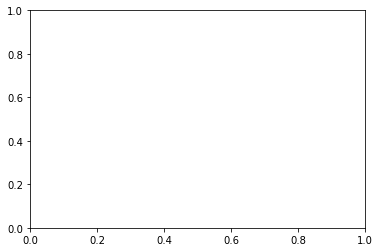

In [74]:
sns.distplot(df['dayofweek'])

In [ ]:


data = [
    go.Heatmap(
        z=df[,
        x=date_list,
        y=programmers,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='GitHub commits per day',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='datetime-heatmap')